# Machine Learning and Statistics Project 2020

## Project Question?

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

## Research

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases. Out of all the renewable energy alternatives, wind energy is the most developed technology worldwide with over 597GW capacity in 2018. [1] 

![image] https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/Turbine.png

The power curve of a wind turbine presents the electrical power output ratings of the machine for different wind speeds. A typical wind turbine power curve has three main characteristic speeds: 1) cut-in (Vc ); 2) rated (Vr ); and 3) cut-out (Vs) speeds. The turbine starts generating power when the wind speed reaches the cut-in value. The rated speed is the wind speed at which the generator is producing the machine’s rated power. When the wind speed reaches the cut-out speed, the power generation is shut down to prevent defects and damages. Theoretical power curves are supplied by manufacturers assuming ideal meteorological and topographical conditions. In practice, however, wind turbines are never used under ideal conditions, and the empirical power curves could be substantially different from the theoretical ones due to the location of the turbine, air density, wind velocity distribution, wind direction, mechanical and control issues, as well as uncertainties in measurements [2]

Wind power is directly related to the wind speed through a so-called power curve. This is a simplified way of expressing the wind power in terms of atmospheric variables. Other atmospheric fields, such as wind shear, turbulence and air density have also impact on the actual power production for a given wind speed. However, for wind power verification wind speed is the most important parameter, because the bulk of the prediction error is caused by the wind speed prediction errors [3]

Given this relationship between wind speed and wind power generation, the efforts in our work will be focused on the prediction of the wind speed variable, because is the fundamental feature for the wind power generation.


![image] https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-Project-2020/main/Wind%20speed%20power.png

## Overview of data

In [36]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as kr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import ploty as py


In [74]:
ds = pd.read_csv("powerproduction.csv")

In [75]:
ds.columns

Index(['speed', 'power'], dtype='object')

In [76]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [77]:
ds = pd.read_csv("powerproduction.csv")

In [72]:
ds.loc[2:8]

,speed,power
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


In [73]:
print(ds.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


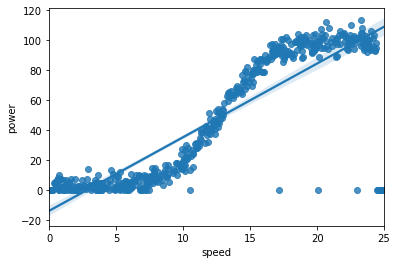

In [11]:
sns.regplot(x='speed',y='power',data = df)
plt.show()

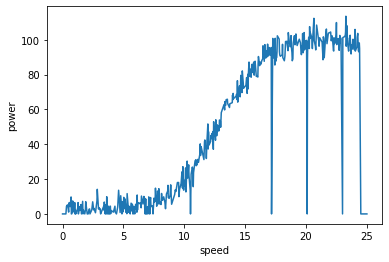

In [9]:
sns.lineplot(x='speed',y='power',data = df)
plt.show()

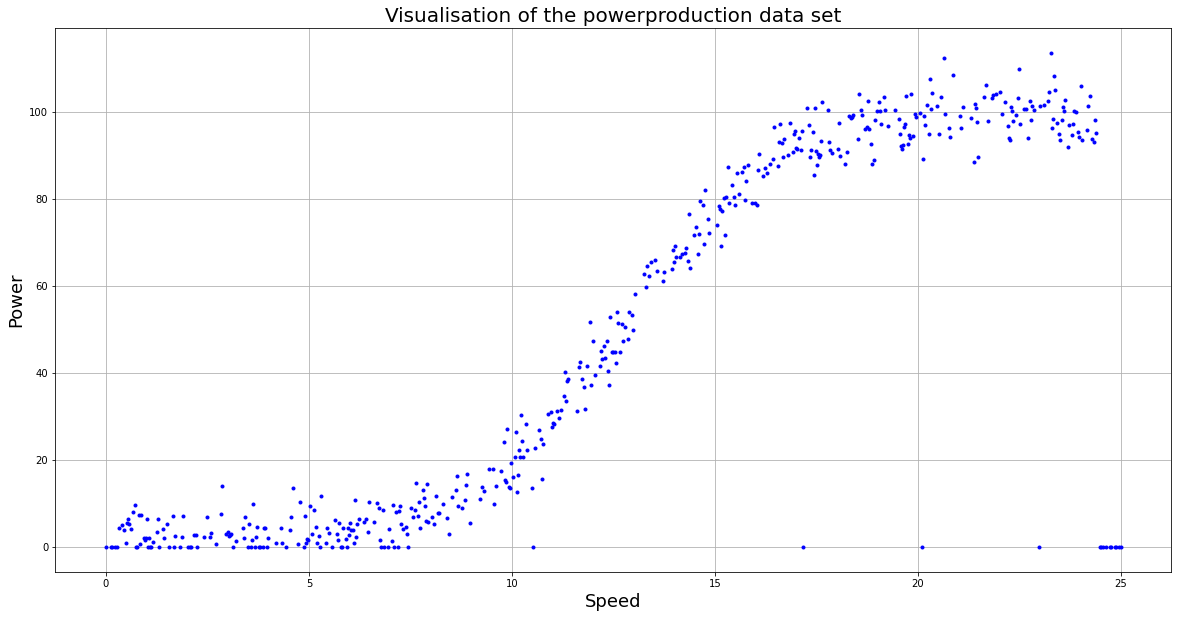

In [14]:
# rc params to customize plot appearance: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2.5

#matplotlib.pyplot used to plot speed and power from the data set
# .b calls for blue dots in the plot
plt.plot(df['speed'], df['power'], '.b')
# add a title to the plot
plt.title('Visualisation of the powerproduction data set', fontsize=20)
# add labels to the x and y axis
plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)
# display grid on the plot
plt.grid()
# show the plot
plt.show()

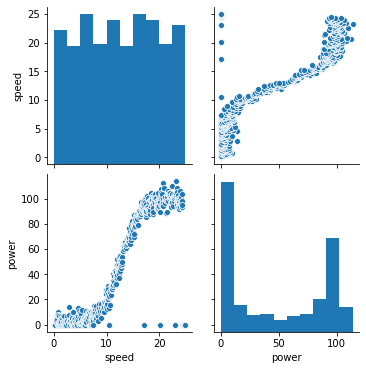

In [15]:
sns.pairplot(df)

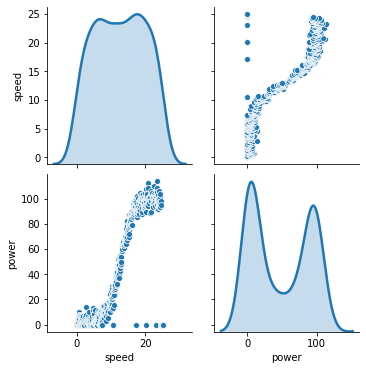

In [16]:

sns.pairplot(df, diag_kind = 'kde')

<AxesSubplot:>

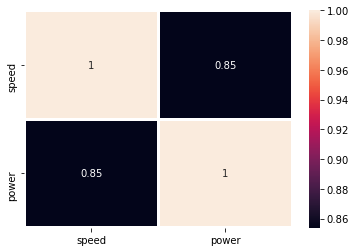

In [12]:
sns.heatmap(df.corr(),linecolor='white',linewidths=2,annot=True)

In [13]:
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


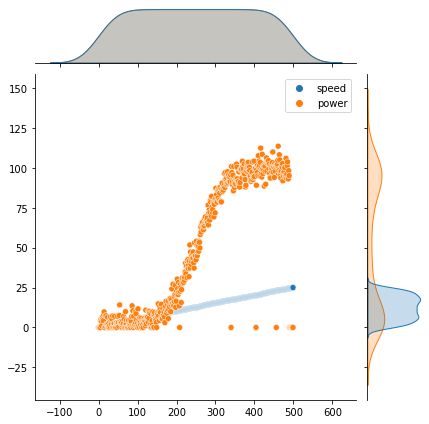

In [14]:
sns.jointplot( data = df)

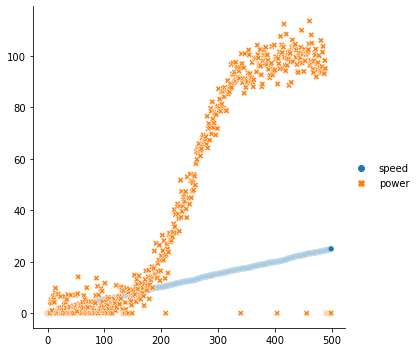

In [22]:
sns.relplot( data=df)

## Cleaning the data

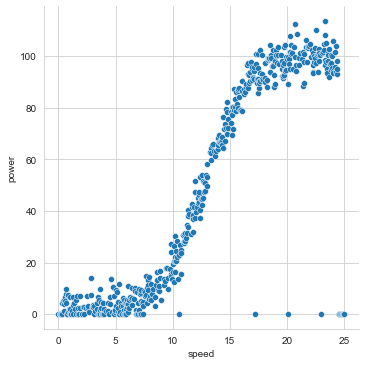

In [78]:
sns.relplot(x="speed", y="power", data=ds);

In [79]:
ds[ds.power == 0].count()

speed    49
power    49
dtype: int64

In [80]:
# Select data from speed & power = to 0.
clean_d = ds[(ds["speed"]==0) & (ds["power"]==0)]

# Values from cars where greater than 0
above_zero = ds[(ds["speed"]>0) & (ds["power"]>0)]

# Append data 
clean_d = clean_d.append(above_zero)

clean_d

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


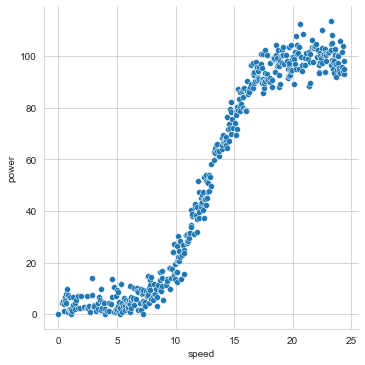

In [81]:
sns.relplot(x="speed", y="power", data=clean_d);

<AxesSubplot:xlabel='speed', ylabel='power'>

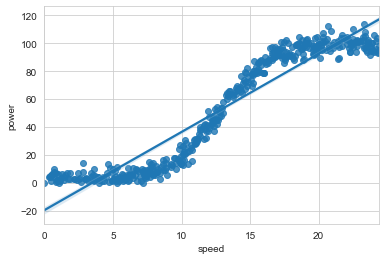

In [82]:
# Pick out two variables.
power = clean_d[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=clean_d)

## k Nearest Neighnour 

## Neural Networks Model 

In [89]:
dataset = clean_d.values

In [90]:
dataset

array([[0.00000e+00, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.05100e+00, 2.08500e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00, 1.20800e+00],
       [1.25100e+00, 3.37300e+00],
       [1.27600e+00, 6.51000e+00],
       [1.40100e+00, 4.15600e+00],
       [1.42600e+00, 2.00500e+00],
       [1.50200e+00, 5.35200e+00],
       [1.65200e+00, 7.22100e+00],
       [1.70200e+00, 2.43900e+00],
       [1.87700e+00,

In [91]:
X = dataset[:,0:1]

In [92]:
Y = dataset[:,1]

In [93]:
from sklearn import preprocessing

In [94]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [95]:
X_scale

array([[0.        ],
       [0.01332022],
       [0.01639411],
       [0.01844338],
       [0.02053363],
       [0.02155826],
       [0.02258289],
       [0.02360752],
       [0.02565679],
       [0.02770605],
       [0.02873069],
       [0.03282921],
       [0.03385385],
       [0.03487848],
       [0.03795238],
       [0.03897701],
       [0.04000164],
       [0.04102627],
       [0.04307554],
       [0.0451248 ],
       [0.04717406],
       [0.05127259],
       [0.05229723],
       [0.05742039],
       [0.05844502],
       [0.0615599 ],
       [0.06770769],
       [0.06975696],
       [0.07692938],
       [0.07795401],
       [0.08922497],
       [0.09127423],
       [0.09844666],
       [0.10152055],
       [0.10463544],
       [0.10566007],
       [0.11078323],
       [0.11590639],
       [0.11693102],
       [0.12102955],
       [0.12307881],
       [0.12410345],
       [0.12512808],
       [0.12615271],
       [0.13127587],
       [0.1384483 ],
       [0.13947293],
       [0.140

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [105]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [107]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

In [109]:
model.compile(optimizer='adam', loss='mean_squared_error') 

In [110]:

model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 1ms/step - loss: 4530.9692
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 4527.1699
Epoch 3/500
10/10 [==============================] - 0s 2ms/step - loss: 4523.3794
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 4519.4678
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 4515.5640
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 4511.5273
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 4507.6001
Epoch 8/500
10/10 [==============================] - 0s 2ms/step - loss: 4503.5474
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 4499.2852
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 4495.1323
Epoch 11/500
10/10 [==============================] - 0s 1ms/step - loss: 4491.0151
Epoch 12/500
10/10 [==============================] - 0s 1ms/step - loss: 4486.6274
E

10/10 [==============================] - 0s 1ms/step - loss: 2923.8647
Epoch 194/500
10/10 [==============================] - 0s 1ms/step - loss: 2913.1631
Epoch 195/500
10/10 [==============================] - 0s 1ms/step - loss: 2902.2739
Epoch 196/500
10/10 [==============================] - 0s 902us/step - loss: 2891.4700
Epoch 197/500
10/10 [==============================] - 0s 1ms/step - loss: 2880.6599
Epoch 198/500
10/10 [==============================] - 0s 1ms/step - loss: 2869.9163
Epoch 199/500
10/10 [==============================] - 0s 904us/step - loss: 2858.9976
Epoch 200/500
10/10 [==============================] - 0s 1ms/step - loss: 2848.3804
Epoch 201/500
10/10 [==============================] - 0s 1ms/step - loss: 2837.2983
Epoch 202/500
10/10 [==============================] - 0s 1ms/step - loss: 2826.7295
Epoch 203/500
10/10 [==============================] - 0s 1ms/step - loss: 2816.3149
Epoch 204/500
10/10 [==============================] - 0s 1ms/step - loss: 

10/10 [==============================] - 0s 3ms/step - loss: 1293.4003
Epoch 385/500
10/10 [==============================] - 0s 2ms/step - loss: 1288.1761
Epoch 386/500
10/10 [==============================] - 0s 1ms/step - loss: 1283.3627
Epoch 387/500
10/10 [==============================] - 0s 1ms/step - loss: 1278.3435
Epoch 388/500
10/10 [==============================] - 0s 1ms/step - loss: 1273.4165
Epoch 389/500
10/10 [==============================] - 0s 1ms/step - loss: 1268.4175
Epoch 390/500
10/10 [==============================] - 0s 1ms/step - loss: 1263.5372
Epoch 391/500
10/10 [==============================] - 0s 1ms/step - loss: 1258.5961
Epoch 392/500
10/10 [==============================] - 0s 1ms/step - loss: 1253.9763
Epoch 393/500
10/10 [==============================] - 0s 1ms/step - loss: 1249.2904
Epoch 394/500
10/10 [==============================] - 0s 2ms/step - loss: 1244.5170
Epoch 395/500
10/10 [==============================] - 0s 2ms/step - loss: 1239

10/10 [==============================] - 0s 902us/step - loss: 971.3669
Epoch 481/500
10/10 [==============================] - 0s 902us/step - loss: 969.4915
Epoch 482/500
10/10 [==============================] - 0s 802us/step - loss: 967.4501
Epoch 483/500
10/10 [==============================] - 0s 902us/step - loss: 965.8305
Epoch 484/500
10/10 [==============================] - 0s 902us/step - loss: 963.8976
Epoch 485/500
10/10 [==============================] - 0s 1ms/step - loss: 962.0978
Epoch 486/500
10/10 [==============================] - 0s 1ms/step - loss: 960.3981
Epoch 487/500
10/10 [==============================] - 0s 902us/step - loss: 958.5919
Epoch 488/500
10/10 [==============================] - 0s 902us/step - loss: 956.8193
Epoch 489/500
10/10 [==============================] - 0s 1ms/step - loss: 955.1819
Epoch 490/500
10/10 [==============================] - 0s 902us/step - loss: 953.3678
Epoch 491/500
10/10 [==============================] - 0s 902us/step - los

In [111]:
model.predict([1.0,2.0,3.0])

array([[ 69.473465],
       [107.219376],
       [144.96529 ]], dtype=float32)

In [112]:
o = clean_d[(clean_d['speed'] >= 2) & (clean_d['speed'] <= 3)]
o

,speed,power
45,2.177,2.701
46,2.227,2.869
48,2.402,2.287
49,2.477,6.947
50,2.553,2.370
51,2.578,3.165
52,2.703,0.667
53,2.828,7.559
54,2.853,14.131
55,2.953,2.894


In [113]:

o.mean()

speed    2.5751
power    4.5590
dtype: float64

## References

1. 
2. https://medium.com/planet-os/calculating-energy-production-from-weather-forecast-in-python-3c990047daa